# Diabetes Risk Prediction
Athour

MD Abu Bokkor Siddique

Warren , MI | 313-564-9863 | siddique5002@gmail.com | linkedin.com/in/mdsiddque

Data: DEC 01 2024

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler, LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.model_selection import KFold
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler  # Add this import


from sklearn.metrics import accuracy_score , classification_report

import warnings
warnings.filterwarnings('ignore')

In [59]:
data = pd.read_csv("C:/Users/abu_s/Desktop/Data/Json/Diabetes Risk Prediction/diabetes_prediction_dataset.csv")

In [61]:
data.head(3)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [65]:
data.describe

<bound method NDFrame.describe of        gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0            

In [87]:
# Converting gender column to numerical values
# Assuming the column name is 'gender', where 'Male' should be 1 and 'Female' should be 0
# Converting gender column to numerical values with handling missing values
data['gender'] = data['gender'].map({'Male': 1, 'Female': 0})
data['gender'].fillna(-1, inplace=True)  # Fill missing values with -1
data['gender'] = data['gender'].astype(int)


In [109]:
# Example of encoding a categorical column to numerical values
data['smoking_history'] = data['smoking_history'].map({'never': 0, 'No Info': 1, 'current': 2})
data['smoking_history'].fillna(-1, inplace=True)  # Fill missing values with -1
data['smoking_history'] = data['smoking_history'].astype(int)

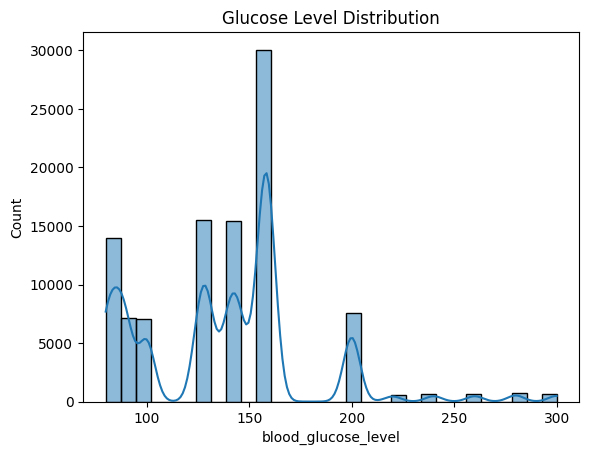

In [111]:
# Exploratory Data Analysis (EDA)
# Univariate analysis: Distribution of a numerical variable (e.g., glucose levels)
sns.histplot(data['blood_glucose_level'], kde=True, bins=30)
plt.title('Glucose Level Distribution')
plt.show()

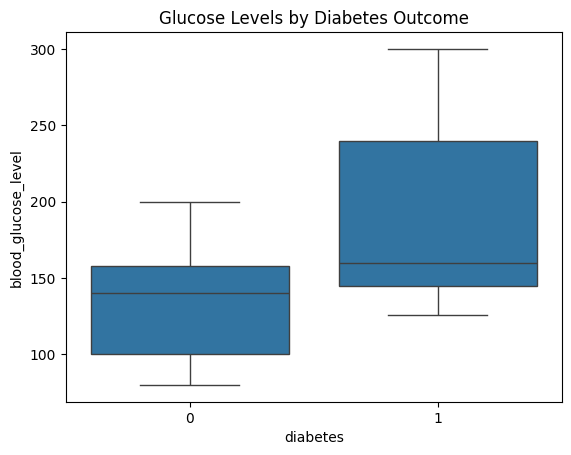

In [112]:
# Bivariate analysis: Relationship between glucose levels and diabetes
sns.boxplot(x='diabetes', y='blood_glucose_level', data=data)
plt.title('Glucose Levels by Diabetes Outcome')
plt.show()

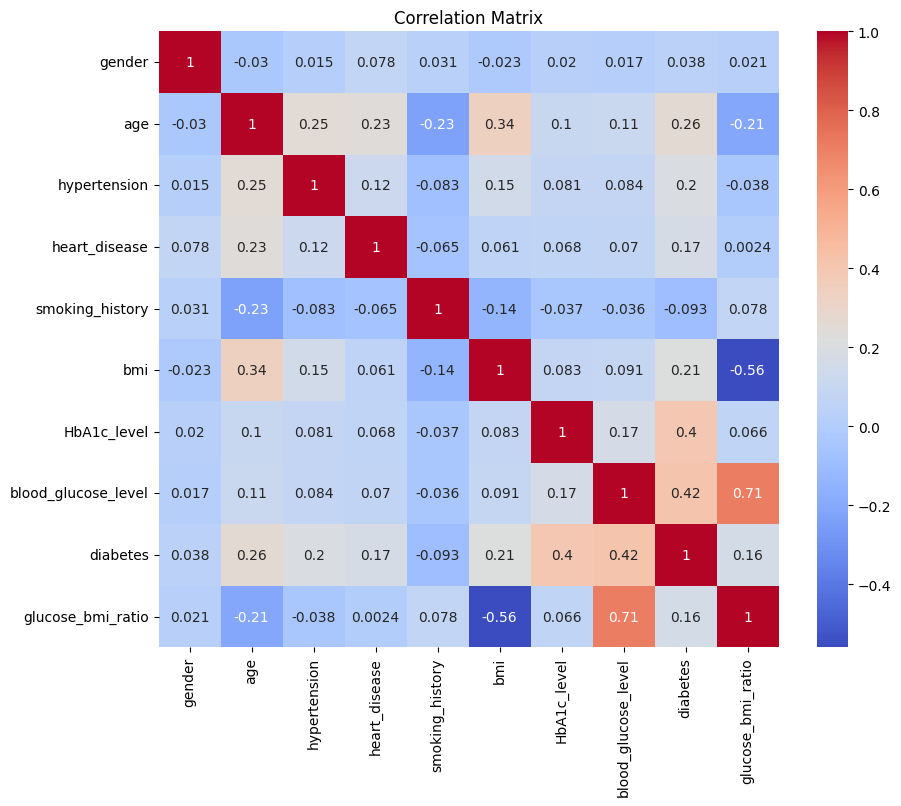

In [142]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Feature Engineering

In [115]:
# Feature Engineering
# Example: Adding a new feature for glucose-to-BMI ratio (if applicable)
data['glucose_bmi_ratio'] = data['blood_glucose_level'] / (data['bmi'] + 1e-3)

In [117]:
# Splitting the dataset for Machine Learning
X = data.drop('diabetes', axis=1)  # Features (replace 'outcome' with your target column)
y = data['diabetes']

## Train And Test Modele

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression

Accuracy: 95.165
Classification Report:               precision    recall  f1-score   support

           0       0.96      0.99      0.97     18292
           1       0.86      0.51      0.65      1708

    accuracy                           0.95     20000
   macro avg       0.91      0.75      0.81     20000
weighted avg       0.95      0.95      0.95     20000



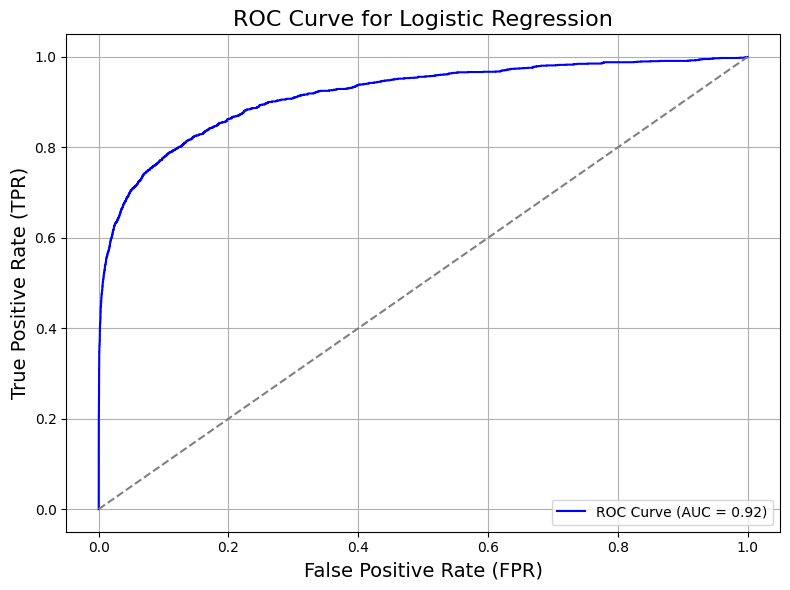

Accuracy: 95.165
Classification Report:               precision    recall  f1-score   support

           0       0.96      0.99      0.97     18292
           1       0.86      0.51      0.65      1708

    accuracy                           0.95     20000
   macro avg       0.91      0.75      0.81     20000
weighted avg       0.95      0.95      0.95     20000



In [125]:
# Encode categorical features to numeric using LabelEncoder
le = LabelEncoder()

# Apply encoding to all categorical columns (assumed here to be object type)
categorical_columns = X_train.select_dtypes(include=['object']).columns
for col in categorical_columns:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

# Create and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Print accuracy and classification report
print('Accuracy:', accuracy_score(y_test, y_pred) * 100)
print('Classification Report:', classification_report(y_test, y_pred))

# Get predicted probabilities for the positive class (1)
y_probs = logreg.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no discrimination)
plt.title('ROC Curve for Logistic Regression', fontsize=16)
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print accuracy and classification report
print('Accuracy:', accuracy_score(y_test, logreg.predict(X_test)) * 100)
print('Classification Report:', classification_report(y_test, logreg.predict(X_test)))

## Decision Tree Classifier

Decision Tree Classifier accuracy: 97.21499999999999
Classification Report:               precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       1.00      0.67      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.99      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



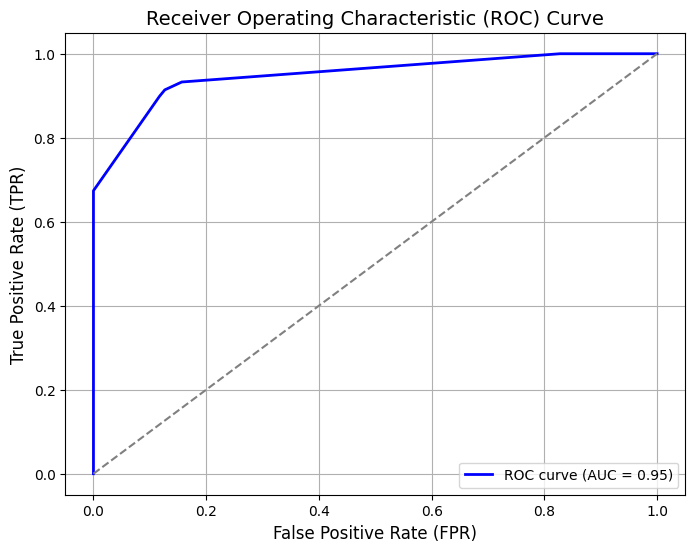

Area Under the Curve (AUC): 0.95


In [132]:
# Create and train the Decision Tree Classifier
dec_clf = DecisionTreeClassifier(criterion='gini', random_state=3, max_depth=5)
dec_clf.fit(X_train, y_train)

# Make predictions
y_pred = dec_clf.predict(X_test)

# Print accuracy and classification report
print('Decision Tree Classifier accuracy:', dec_clf.score(X_test, y_test) * 100)
print('Classification Report:', classification_report(y_test, y_pred))

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc  # Ensure auc is imported correctly

# Train the Decision Tree Classifier
dec_clf = DecisionTreeClassifier(criterion='gini', random_state=3, max_depth=5)
dec_clf.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_probs = dec_clf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute the AUC (Area Under the Curve)
roc_auc_value = auc(fpr, tpr)  # Changed variable name to avoid conflict

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no discrimination)
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Print the AUC
print(f'Area Under the Curve (AUC): {roc_auc_value:.2f}')


## Random Forest classifier

Random Forest Classifier accuracy: 97.005
Classification Report:               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.94      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.85      0.89     20000
weighted avg       0.97      0.97      0.97     20000



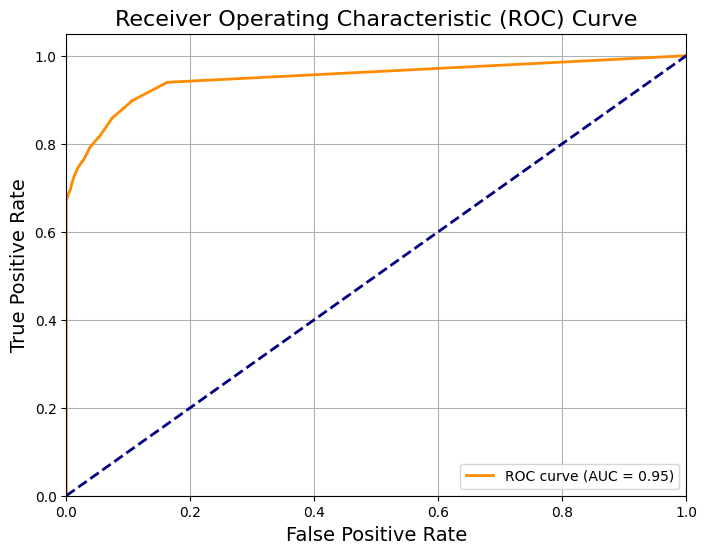

In [136]:
# Create and train the Random Forest classifier
rand_clf = RandomForestClassifier(n_estimators=20, criterion="entropy")
rand_clf.fit(X_train, y_train)

# Make predictions
y_pred = rand_clf.predict(X_test)

# Print accuracy and classification report
print('Random Forest Classifier accuracy:', rand_clf.score(X_test, y_test) * 100)
print('Classification Report:', classification_report(y_test, y_pred))



# Create and train the Random Forest classifier
rand_clf = RandomForestClassifier(n_estimators=20, criterion="entropy")
rand_clf.fit(X_train, y_train)

# Make predictions
y_pred = rand_clf.predict(X_test)
y_prob = rand_clf.predict_proba(X_test)  # Probability scores



# Binarize the output for ROC curve (for multiclass problems, you might need to handle each class separately)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  # Binarize the test labels

# Compute ROC curve and AUC for each class
fpr, tpr, thresholds = roc_curve(y_test_bin.ravel(), y_prob[:, 1].ravel())  # For binary classification, you can use [:, 1]

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## Naive Bayes

The accuracy of Naive Bayes is: 90.89
Classification Report:               precision    recall  f1-score   support

           0       0.97      0.93      0.95     18292
           1       0.48      0.64      0.55      1708

    accuracy                           0.91     20000
   macro avg       0.72      0.79      0.75     20000
weighted avg       0.92      0.91      0.91     20000



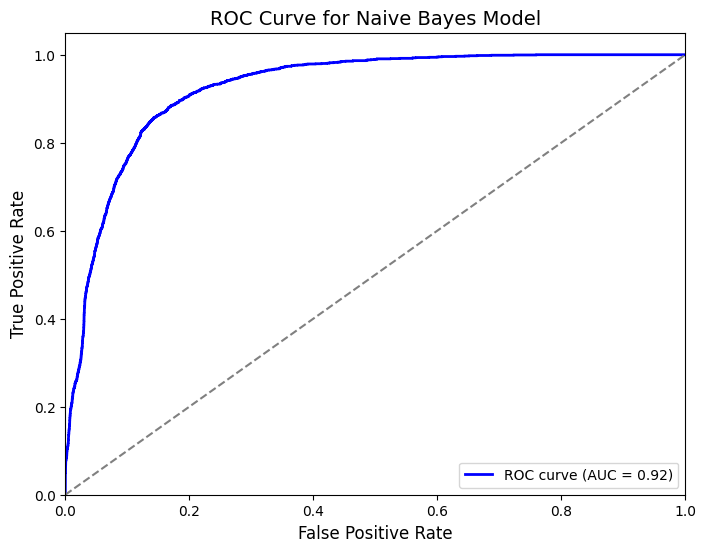

In [140]:
# Create and train the Naive Bayes classifier
NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train, y_train)

# Make predictions using Naive Bayes model
y_pred = NaiveBayes.predict(X_test)

# Print accuracy and classification report
print('The accuracy of Naive Bayes is:', accuracy_score(y_test, y_pred) * 100)
print('Classification Report:', classification_report(y_test, y_pred))


# Train the Naive Bayes model
NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train, y_train)

# Make predictions using Naive Bayes model
y_pred = NaiveBayes.predict(X_test)



# ROC Curve
# Get the predicted probabilities for the positive class
y_prob = NaiveBayes.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (class 1)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve for Naive Bayes Model', fontsize=14)
plt.legend(loc='lower right')
plt.show()
